In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline


In [2]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [3]:
penguins = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/c19a904462482430170bfe2c718775ddb7dbb885/inst/extdata/penguins.csv")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
penguins = penguins.dropna()
penguins.species.value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

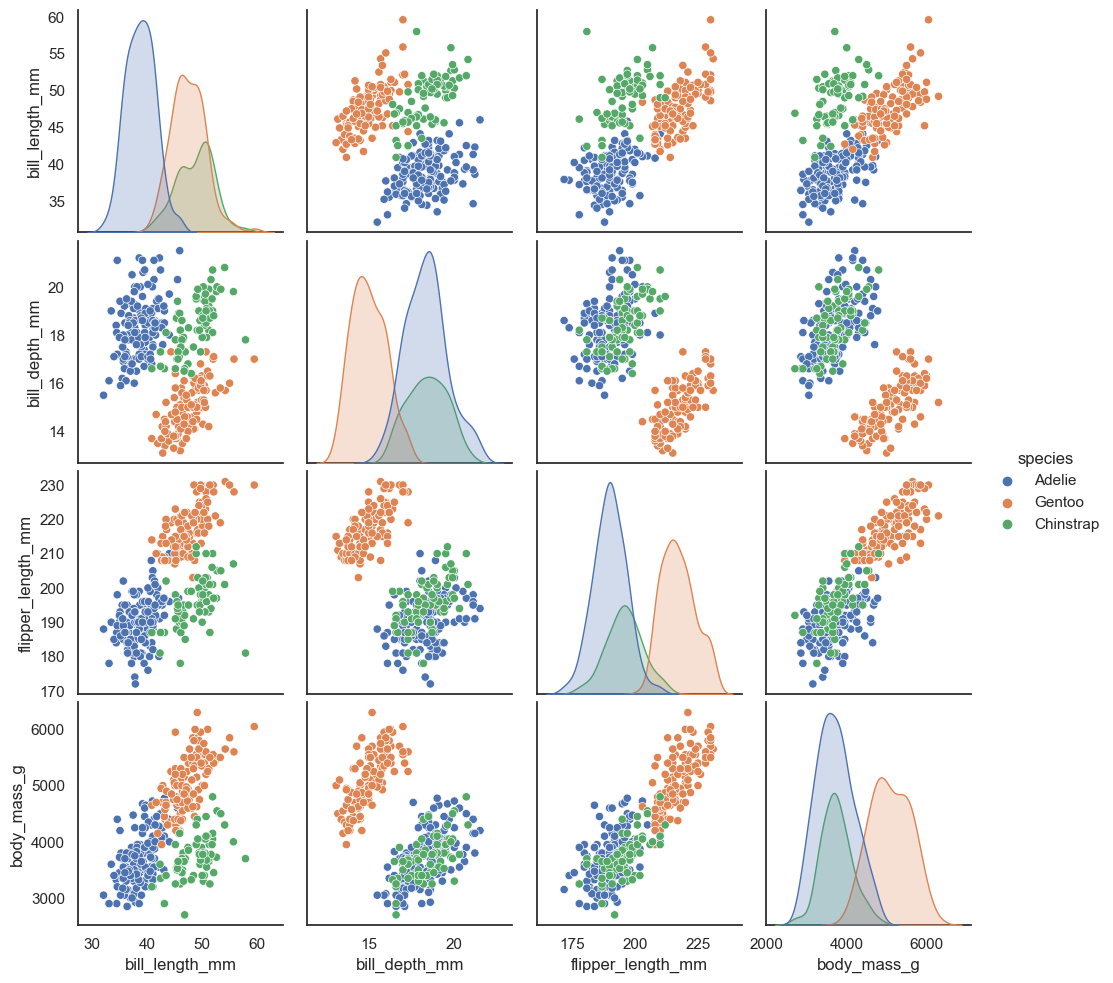

In [5]:
sns.pairplot(penguins.drop("year", axis=1), hue='species');

In [13]:
import umap
reducer = umap.UMAP()


In [11]:
penguin_data = penguins[
    [
        "bill_length_mm",
        "bill_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values

scaled_penguin_data = StandardScaler().fit_transform(penguin_data)
scaled_penguin_data.shape

(333, 4)

In [12]:

embedding = reducer.fit_transform(scaled_penguin_data)
embedding.shape

(333, 2)

In [14]:
penguins.species

0         Adelie
1         Adelie
2         Adelie
4         Adelie
5         Adelie
         ...    
339    Chinstrap
340    Chinstrap
341    Chinstrap
342    Chinstrap
343    Chinstrap
Name: species, Length: 333, dtype: object

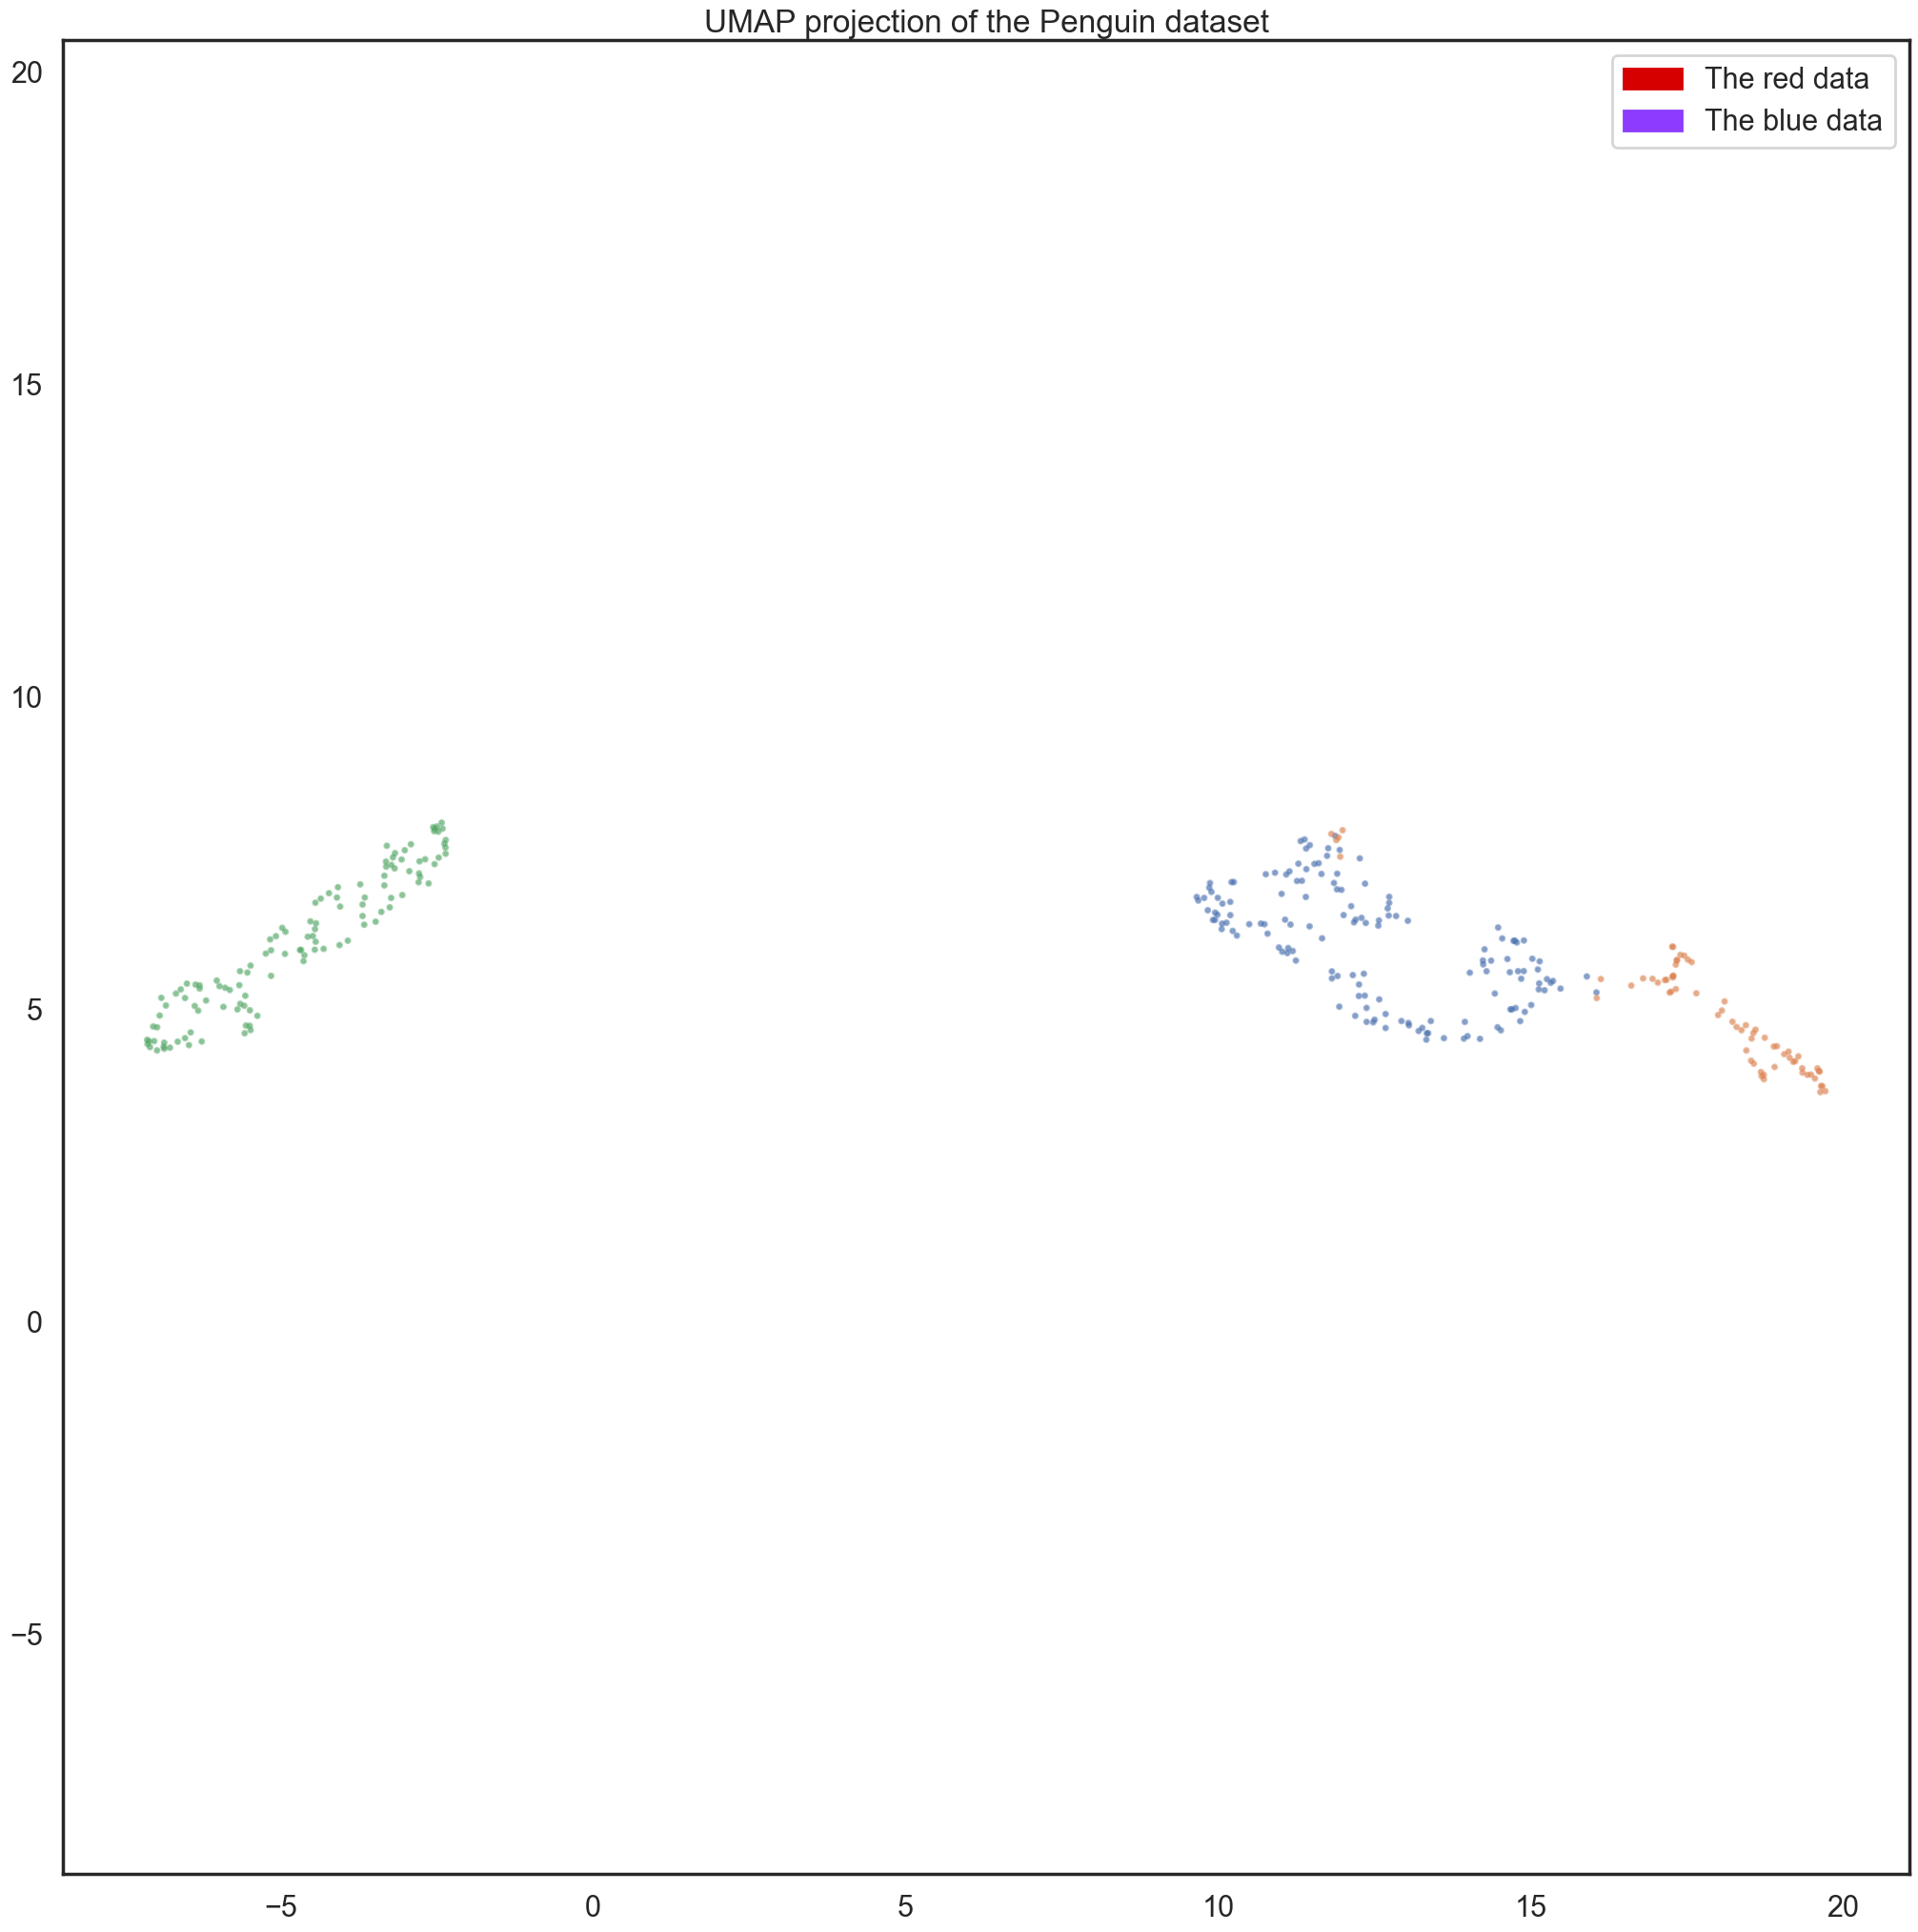

In [33]:
sns.set(style='white', context='poster', rc={'figure.figsize':(25,25)})
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})],
    s=10,
    alpha=0.5,
    )
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24)

import matplotlib.patches as mpatches
import colorcet as cc

palette = sns.color_palette(cc.glasbey, n_colors=30)
red_patch = mpatches.Patch(color=palette[0], label='The red data')
blue_patch = mpatches.Patch(color=palette[1], label='The blue data')

plt.legend(handles=[red_patch, blue_patch], bbox_to_anchor=(1, 1))
plt.show()